## Diabetes Detection Project

This notebook contains the code developed for the Diabetes Detection Project. Throughout the document, all stages of the classification workflow are presented in a structured manner: data loading and exploration, data preprocessing, model construction and evaluation, and results analysis.

In addition to the code, detailed explanations are included to help understand each step taken and the methodological decisions made during the project.

### Web con el trabajo hecho:
https://www.kaggle.com/code/zabihullah18/diabetes-prediction/notebook

#### DataSet Information

The Diabetes Health Indicators Dataset is a public dataset available on Kaggle and the UCI Machine Learning Repository (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?). It originates from the CDC’s BRFSS (Behavioral Risk Factor Surveillance System) survey, a large-scale epidemiological study conducted in the United States. The dataset contains over 70,000 samples and 35 features that include demographic information, lifestyle habits, health indicators, and responses to medical questionnaires.


The task addressed in this project is a supervised classification problem, where the target variable represents the patient's diabetes status with three classes:

- 0: Healthy
- 1: Prediabetes
- 2: Diabetes

This dataset is particularly suitable for training and comparing classification models, evaluating imbalance-handling techniques, and analyzing the relevance of health-related variables.

| Variable             | Descripción                                                                                  | Valores posibles                                  |
|----------------------|----------------------------------------------------------------------------------------------|-------------------------------------------------|
| **Diabetes**         | Estado del paciente respecto a la diabetes                                                   | No, Pre-Diabetes, Diabetes                     |
| **HighBP**           | Hipertensión: presión arterial alta                                                         | No, Yes                                        |
| **HighChol**         | Colesterol alto                                                                              | No, Yes                                        |
| **CholCheck**        | Ha realizado un control de colesterol en los últimos 5 años                                  | No, Yes                                        |
| **Smoker**           | ¿Ha fumado al menos 100 cigarrillos en su vida?                                             | No, Yes                                        |
| **Stroke**           | ¿Ha tenido algún accidente cerebrovascular?                                                 | No, Yes                                        |
| **HeartAttack**      | Enfermedad cardíaca o infarto previo                                                        | No, Yes                                        |
| **PhysActivity**     | Ha realizado actividad física en los últimos 30 días                                        | No, Yes                                        |
| **Fruits**           | Consume fruta al menos una vez al día                                                      | No, Yes                                        |
| **Veggies**          | Consume verduras al menos una vez al día                                                  | No, Yes                                        |
| **Heavy_drinking**   | Consumo excesivo de alcohol (hombres >14, mujeres >7 bebidas/semana)                        | No, Yes                                        |
| **HealthCare**       | Tiene algún tipo de cobertura sanitaria (seguro, HMO, etc.)                                 | No, Yes                                        |
| **Unaffordable_care**| ¿Ha necesitado atención médica en los últimos 12 meses pero no pudo por coste?              | No, Yes                                        |
| **GeneralHealth**    | Salud general percibida                                                                      | Excellent, Very Good, Good, Fair, Poor        |
| **PhysicalHealth**   | Número de días en el último mes con problemas físicos                                        | Valor numérico (0-30)                          |
| **MentalHealth**     | Número de días en el último mes con problemas mentales                                       | Valor numérico (0-30)                          |
| **DiffWalk**         | ¿Tiene dificultad para caminar o subir escaleras?                                           | No, Yes                                        |
| **Sex**              | Sexo del paciente                                                                            | Female, Male                                   |


In [19]:
import json 

with open('../data/dictionary.json', 'r') as f:
    data_dict = json.load(f)

display(data_dict)

{'PatientID': {'type': 'no', 'map': {}, 'description': 'Patient ID'},
 'Diabetes': {'type': 'category',
  'map': {'0': 'No', '1': 'Pre-Diabetes', '2': 'Diabetes'},
  'description': 'Diabetes status. 0 = no diabetes, 1 = prediabetes, 2 = diabetes'},
 'HighBP': {'type': 'category',
  'map': {'0': 'No', '1': 'Yes'},
  'description': 'High blood pressure. 0 = no high BP, 1 = high BP'},
 'HighChol': {'type': 'category',
  'map': {'0': 'No', '1': 'Yes'},
  'description': 'High cholesterol. 0 = no high cholesterol, 1 = high cholesterol'},
 'CholCheck': {'type': 'category',
  'map': {'0': 'No', '1': 'Yes'},
  'description': 'Cholesterol check in the past 5 years. 0 = no, 1 = yes'},
 'BMI': {'type': 'float64', 'map': {}, 'description': 'Body Mass Index'},
 'Smoker': {'type': 'category',
  'map': {'0': 'No', '1': 'Yes'},
  'description': 'Have you smoked at least 100 cigarettes? 0 = no, 1 = yes'},
 'Stroke': {'type': 'category',
  'map': {'0': 'No', '1': 'Yes'},
  'description': 'Ever told you h

In [132]:
import pandas as pd

# Ruta del archivo CSV
archivo_csv = "../data/diabetes_012_health_indicators_BRFSS2015.csv"

# Cargar el CSV en un DataFrame
df = pd.read_csv(archivo_csv)
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


Hacemos un primer estudio de los tipos de datos, ya que en su mayoria son valores numéricos, pero pueden existir variables categoricas, y tipos que debamos corregir.

In [133]:
# Mostrar valores únicos de cada columna (útil para inspeccionar)
for col in df.columns:
    print(f"\nColumna: {col}")
    print(df[col].dtype, df[col].unique()[:10])  


Columna: Diabetes_012
float64 [0. 2. 1.]

Columna: HighBP
float64 [1. 0.]

Columna: HighChol
float64 [1. 0.]

Columna: CholCheck
float64 [1. 0.]

Columna: BMI
float64 [40. 25. 28. 27. 24. 30. 34. 26. 33. 21.]

Columna: Smoker
float64 [1. 0.]

Columna: Stroke
float64 [0. 1.]

Columna: HeartDiseaseorAttack
float64 [0. 1.]

Columna: PhysActivity
float64 [0. 1.]

Columna: Fruits
float64 [0. 1.]

Columna: Veggies
float64 [1. 0.]

Columna: HvyAlcoholConsump
float64 [0. 1.]

Columna: AnyHealthcare
float64 [1. 0.]

Columna: NoDocbcCost
float64 [0. 1.]

Columna: GenHlth
float64 [5. 3. 2. 4. 1.]

Columna: MentHlth
float64 [18.  0. 30.  3.  5. 15. 10.  6. 20.  2.]

Columna: PhysHlth
float64 [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.]

Columna: DiffWalk
float64 [1. 0.]

Columna: Sex
float64 [0. 1.]

Columna: Age
float64 [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.]

Columna: Education
float64 [4. 6. 3. 5. 2. 1.]

Columna: Income
float64 [3. 1. 8. 6. 4. 7. 2. 5.]


In [134]:
df.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)
df.rename(columns={'HeartDiseaseorAttack': 'HeartAttack'}, inplace=True)
df.rename(columns={'HvyAlcoholConsump': 'Heavy_drinking'}, inplace=True)
df.rename(columns={'AnyHealthcare': 'HealthCare'}, inplace=True)
df.rename(columns={'NoDocbcCost': 'Unaffordable_care'}, inplace=True)
df.rename(columns={'GenHlth': 'GeneralHealth'}, inplace=True)
df.rename(columns={'GenHlth': 'GeneralHealth'}, inplace=True)
df.rename(columns={'PhysHlth': 'PhysicalHealth'}, inplace=True)

In [140]:
# Lista de columnas que queremos convertir a int
cols_to_int = [
    'Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
    'HeartAttack', 'PhysActivity', 'Fruits', 'Veggies', 'Heavy_drinking', 
    'HealthCare', 'Unaffordable_care', 'GeneralHealth', 'DiffWalk', 'Sex', 
    'Age', 'Education', 'Income',
]

# Convertir columnas a int antes de mapear
for col in cols_to_int:
    df[col] = df[col].astype(int)

In [136]:
print("📌 Dimensiones del dataset:")
print(df.shape)

summary = pd.DataFrame({
    'dtype': df.dtypes,
    'nulls': df.isnull().sum(),
})

print(summary)

📌 Dimensiones del dataset:
(253680, 22)
                     dtype  nulls
Diabetes             int64      0
HighBP               int64      0
HighChol             int64      0
CholCheck            int64      0
BMI                float64      0
Smoker               int64      0
Stroke               int64      0
HeartAttack          int64      0
PhysActivity         int64      0
Fruits               int64      0
Veggies              int64      0
Heavy_drinking       int64      0
HealthCare           int64      0
Unaffordable_care    int64      0
GeneralHealth        int64      0
MentHlth           float64      0
PhysicalHealth     float64      0
DiffWalk             int64      0
Sex                  int64      0
Age                  int64      0
Education            int64      0
Income               int64      0


In [137]:
cols_numeric = df.select_dtypes(include=['float64']).columns.tolist()
cols_categorical = df.select_dtypes(include=['int64']).columns.tolist()

print("\n📌 Columnas numéricas:", cols_numeric)
print("📌 Columnas categóricas:", cols_categorical)


📌 Columnas numéricas: ['BMI', 'MentHlth', 'PhysicalHealth']
📌 Columnas categóricas: ['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartAttack', 'PhysActivity', 'Fruits', 'Veggies', 'Heavy_drinking', 'HealthCare', 'Unaffordable_care', 'GeneralHealth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [138]:
print("\n📌 Estadísticas descriptivas (numéricas):")
print(df[cols_numeric].describe())


📌 Estadísticas descriptivas (numéricas):
                 BMI       MentHlth  PhysicalHealth
count  253680.000000  253680.000000   253680.000000
mean       28.382364       3.184772        4.242081
std         6.608694       7.412847        8.717951
min        12.000000       0.000000        0.000000
25%        24.000000       0.000000        0.000000
50%        27.000000       0.000000        0.000000
75%        31.000000       2.000000        3.000000
max        98.000000      30.000000       30.000000


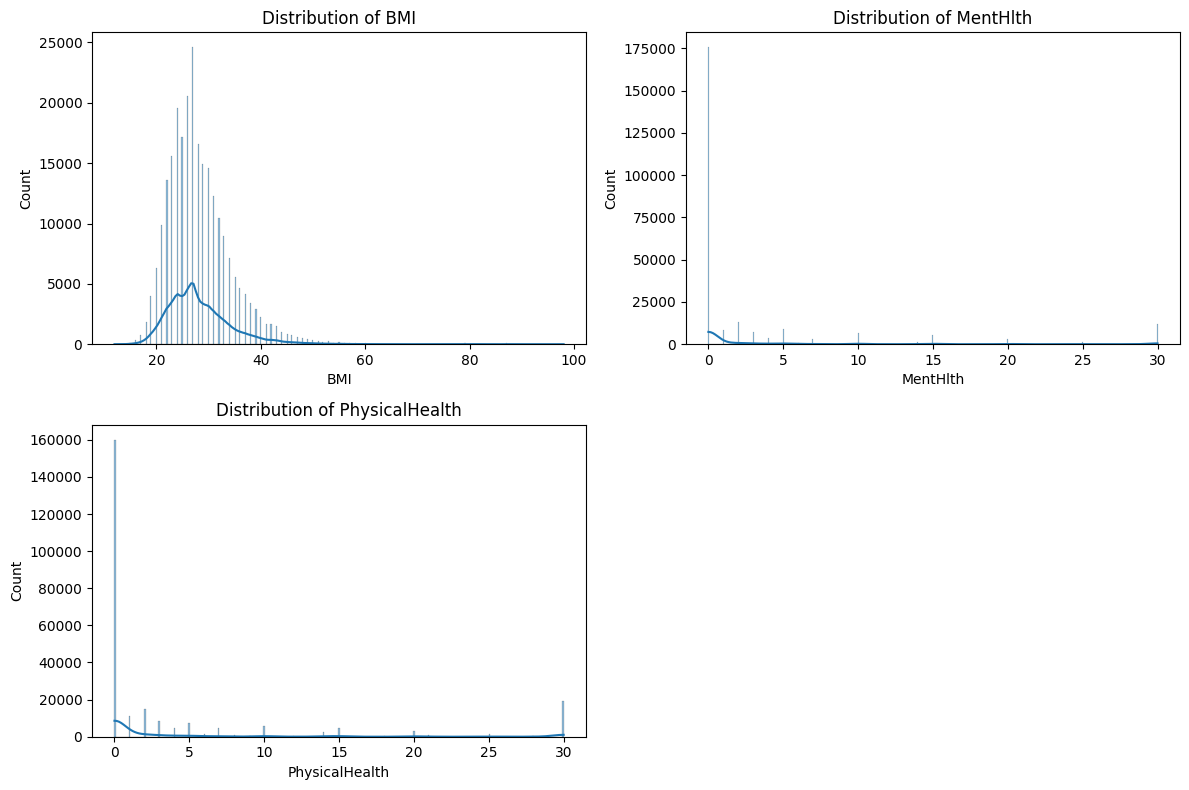

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns


cols_to_plot = cols_numeric[:3]

fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()

for i in range(2):
    sns.histplot(df[cols_to_plot[i]], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {cols_to_plot[i]}")

sns.histplot(df[cols_to_plot[2]], kde=True, ax=axes[2])
axes[2].set_title(f"Distribution of {cols_to_plot[2]}")
axes[3].set_visible(False)

plt.tight_layout()
plt.show()


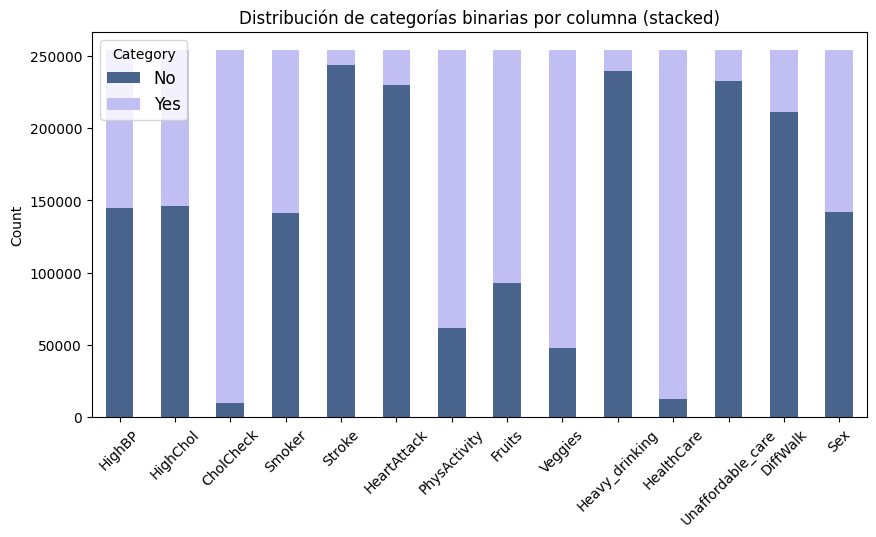

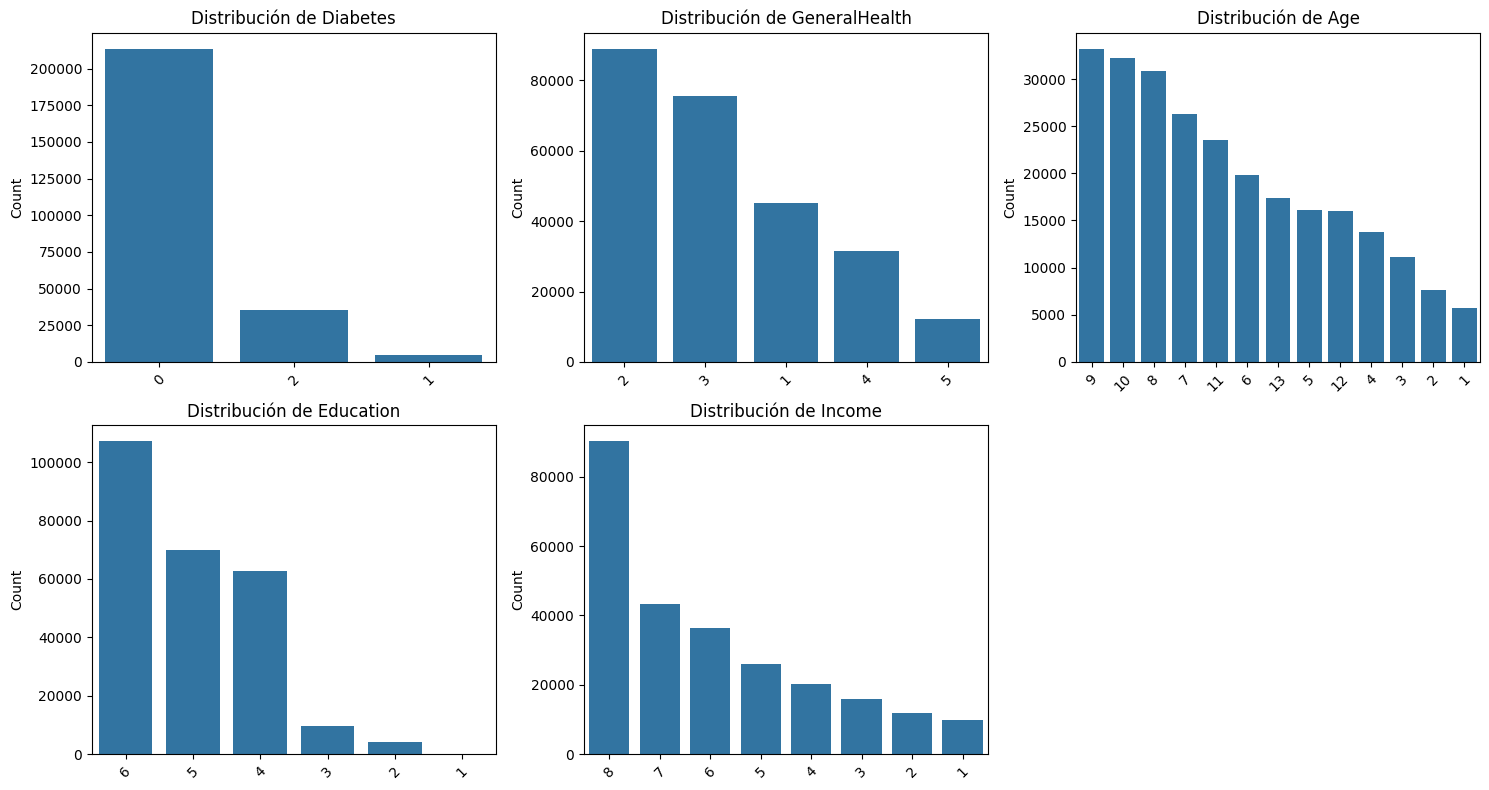

In [168]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Separar columnas binarias (solo 2 categorías) y no binarias
cols_binarias = [col for col in cols_categorical if df[col].nunique() == 2]
cols_no_binarias = [col for col in cols_categorical if df[col].nunique() > 2]

# --- Binarias: stacked bar plot ---
cat_counts = pd.DataFrame({col: df[col].value_counts() for col in cols_binarias}).T.fillna(0)
cat_counts.plot(kind="bar", stacked=True, figsize=(10,5), color = ["#48648c", "#c1bef4"])
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Distribución de categorías binarias por columna (stacked)")
plt.legend(labels=['No', 'Yes'], title='Category', fontsize=12, title_fontsize=10) 
plt.show()


# Número de columnas no binarias
n_cols = len(cols_no_binarias)
cols_por_fila = 3
n_filas = math.ceil(n_cols / cols_por_fila)

# Crear la figura y los ejes
fig, axes = plt.subplots(n_filas, cols_por_fila, figsize=(5*cols_por_fila, 4*n_filas))
axes = axes.flatten()  # para iterar fácilmente

for i, col in enumerate(cols_no_binarias):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [126]:
from scipy import stats
import numpy as np


print("\n📌 Outliers detectados (Z-score > 3):")
for col in cols_numeric:
    zs = np.abs(stats.zscore(df[col]))
    outliers = (zs > 3).sum()
    print(f"{col}: {outliers} outliers")

print("\n📌 Outliers detectados usando IQR:")
for col in cols_numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col].count()
    print(f"{col}: {outliers} outliers")


📌 Outliers detectados (Z-score > 3):
BMI: 2963 outliers
MentHlth: 12697 outliers
PhysicalHealth: 0 outliers
Age: 0 outliers
Education: 4217 outliers
Income: 0 outliers

📌 Outliers detectados usando IQR:
BMI: 9847 outliers
MentHlth: 36208 outliers
PhysicalHealth: 40949 outliers
Age: 0 outliers
Education: 0 outliers
Income: 0 outliers
